## Intro

Date de intrare:
- Cate o fotografie pentru fiecare student din grupa cu denumirea "Nume Prenume.jpg". 
> Folder utilizat: *"Lista studenti"*
- Cate o fotografie pentru fiecare persoana care a fost prezenta la curs. 
> Folder utilizat: *"Foto studenti prezenti la curs"*

Date de iesire:
- Nume si fotografii studenti care au fost la curs
- Nume si fotografii studenti care nu au fost la curs
- Fotografii persoane care au fost la curs insa nu sunt in grupa.

## Import-uri

In [1]:
from os import listdir   # Utilizam metoda listdir() din modulul os pentru a enumera toate fisierele dintr-un director
 
import face_recognition  # Utilizam aceasta librarie pentru a recunoaste fetele

from PIL import Image    # Utilizam aceasta librarie pentru a lucra cu imaginile

from IPython.display import display    # Utilizam aceasta librarie pentru a afisa imaginile


## Citire nume studenti

In [2]:
dosar_studenti = "./Lista studenti/"      # Adresa folderului in care sunt imagini cu fiecare student din grupa

nume_studenti = listdir(dosar_studenti)   # listdir() returneaza o lista cu continutul unui anumit director

nume_studenti    

['Allan Pease.jpg',
 'Andrew Ng.jpg',
 'Gwynne Shotwell.jpg',
 'Jamie Dimon.jpg',
 'Maia Sandu.jpg',
 'Simona Halep.jpg',
 'Elon Musk.jpg']

In [3]:
# Sterg .jpg de la numele studentilor. Folosesc [:-4] pentru a sterge ultimele 4 caractere
for i in range(len(nume_studenti)):           
    nume_studenti[i] = nume_studenti[i][:-4];         

nume_studenti

['Allan Pease',
 'Andrew Ng',
 'Gwynne Shotwell',
 'Jamie Dimon',
 'Maia Sandu',
 'Simona Halep',
 'Elon Musk']

## Citire adrese foto studenti

In [4]:
# Cream o lista in care vom pastra adresa pentru fiecare foto a studentilor
adrese_studenti = listdir(dosar_studenti)     # lista cu numele studentilor

# Adaug adresa dosarului la numele fisierului 
for i in range(len(adrese_studenti)):
    adrese_studenti[i] = dosar_studenti + adrese_studenti[i];   

adrese_studenti

['./Lista studenti/Allan Pease.jpg',
 './Lista studenti/Andrew Ng.jpg',
 './Lista studenti/Gwynne Shotwell.jpg',
 './Lista studenti/Jamie Dimon.jpg',
 './Lista studenti/Maia Sandu.jpg',
 './Lista studenti/Simona Halep.jpg',
 './Lista studenti/Elon Musk.jpg']

## Citire adrese foto studenti prezenti la curs

In [5]:
# Cream o lista in care vom pastra adresa pentru fiecare foto a studentilor prezenti la curs
dosar_prezenti = "./Foto studenti prezenti la curs/"

adrese_prezenti = listdir(dosar_prezenti)      # lista cu studentii prezenti la curs

# Adaug adresa dosarului la numele fisierului
for i in range(len(adrese_prezenti)):
    adrese_prezenti[i] = dosar_prezenti + adrese_prezenti[i];
    
adrese_prezenti

['./Foto studenti prezenti la curs/Necunoscut 5.jpg',
 './Foto studenti prezenti la curs/Necunoscut 4.jpg',
 './Foto studenti prezenti la curs/Necunoscut 2.jpg',
 './Foto studenti prezenti la curs/Necunoscut 8.jpg',
 './Foto studenti prezenti la curs/Necunoscut 6.jpg',
 './Foto studenti prezenti la curs/Necunoscut 1.jpg',
 './Foto studenti prezenti la curs/Necunoscut 3.jpg']

## Functie pentru redimensionarea imaginilor

In [6]:
# creez o functie pentru redimensionarea imaginilor
def redimensionare(adresa_imagine):
    
    """ Functia returneaza imaginile primite ca argument redimensionate
    
    """
    latime = 600                                                    # aceasta constanta e utilizata pentru a seta latimi egale tuturor imaginilor 
    imagine = Image.open(adresa_imagine)                            
    procentaj_latime = (latime/float(imagine.size[0]))              # calculez raportul intre latimea de baza si latimea imaginii actuale pentru a seta inaltimea potrivita 
                                                                    # in raport cu latimea de baza
        
    inaltime = int(float(imagine.size[1])*float(procentaj_latime))  # calculez valoarea inaltimii pe care trebuie sa o aplic imaginii inmultind valoarea imaginii actuale 
                                                                    # cu procentajul latimii
    
    imagine = imagine.resize((latime, inaltime), Image.LANCZOS)     # utilizez filtrul pentru reesantionare LANCZOS pentru o calitate buna a imaginii
    return imagine

# Verificare studenti prezenti la curs

In [7]:
# Initial consideram ca nici un student nu a fost prezent la curs
prezent_la_curs = [False] * len(nume_studenti)
prezent_la_curs

[False, False, False, False, False, False, False]

Aceasta persoana a fost prezenta la curs insa nu este din grupa


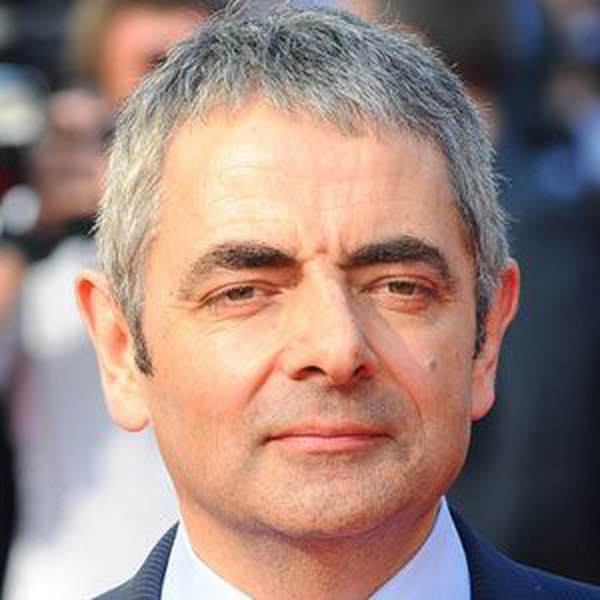

In [8]:
for i in adrese_prezenti:                                   # parcurg toate fotografiile studentilor prezenti la curs
    necunoscut = True
    imagine_prezent = face_recognition.load_image_file(i)   # incarc imagine cu persoana prezenta la curs
    

    trasaturi_fata_prezent = face_recognition.face_encodings(imagine_prezent)[0]   # Identific trasaturile fetei studentului prezent la curs
    
    for j in range(len(nume_studenti)):                    # parcurg toate fotografiile studentilor din grupa
        imagine_student = face_recognition.load_image_file(adrese_studenti[j])    # incarc imaginice cu studentii din grupa
        trasaturi_fata_student = face_recognition.face_encodings(imagine_student)[0]     # Idebtific trasaturile fetei studentului din imagine
        
        compara_fete = face_recognition.compare_faces([trasaturi_fata_prezent], trasaturi_fata_student)  # Verific daca trasaturile fetei persoanei prezente la curs
                                                                                                         # corespund cu trasaturile unuia din studentii din grupa
        if compara_fete == [True]:                        # functia compare_faces are output de tip lista, de aceea compar cu [True]
            prezent_la_curs[j] = True
            necunoscut = False
    if necunoscut == True:
        print("Aceasta persoana a fost prezenta la curs insa nu este din grupa")
        display(redimensionare(i))



Afisare studenti care au fost la curs:
Allan Pease


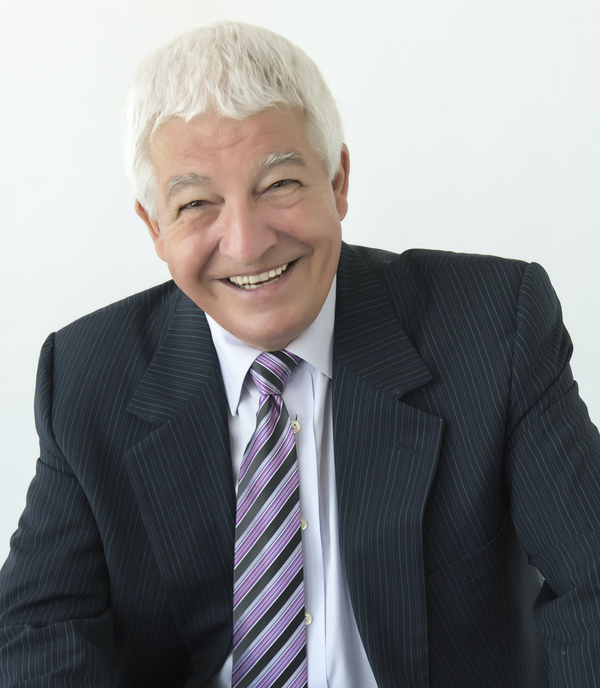

Andrew Ng


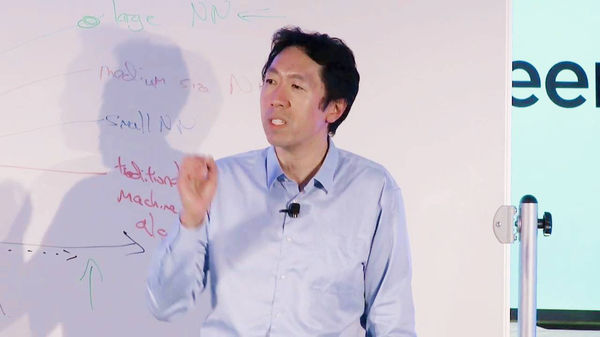

Gwynne Shotwell


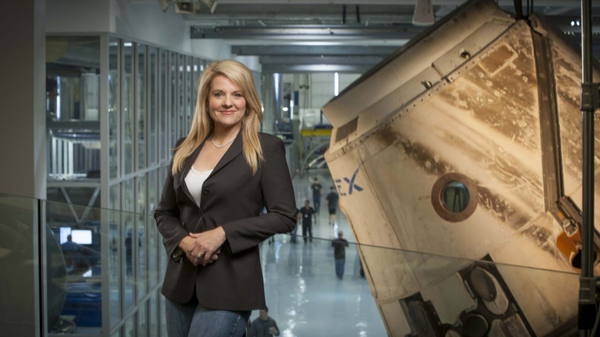

Maia Sandu


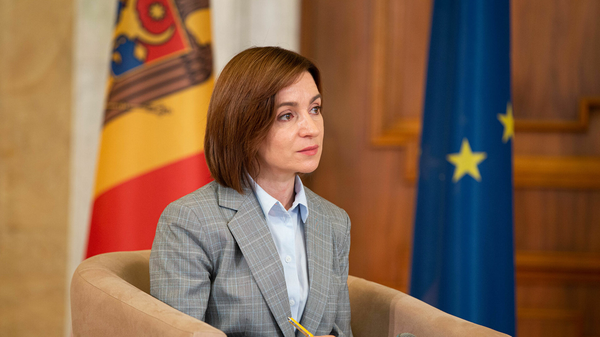

Simona Halep


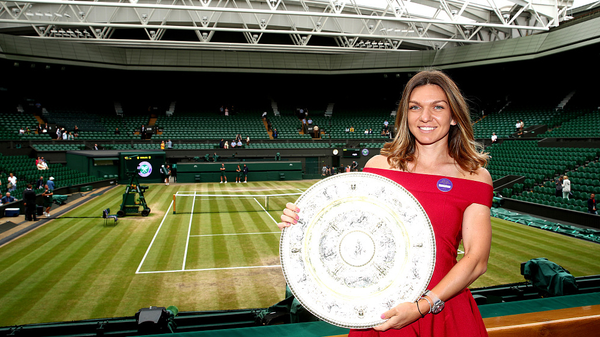

Elon Musk


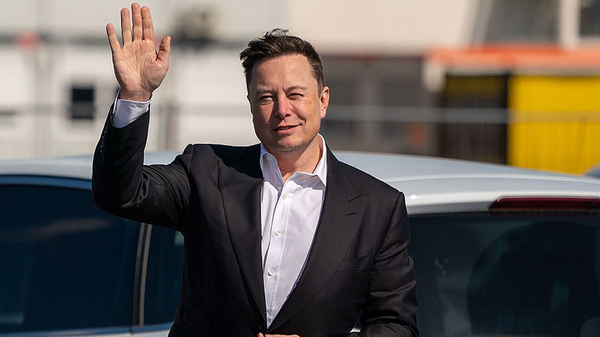

In [9]:
# Afisare studenti care au fost la curs:
print("Afisare studenti care au fost la curs:")
for i in range(len(nume_studenti)):
    if prezent_la_curs[i] == True:
        print(nume_studenti[i])
        display(redimensionare(adrese_studenti[i]))

Afisare studenti care nu au fost la curs:
Jamie Dimon


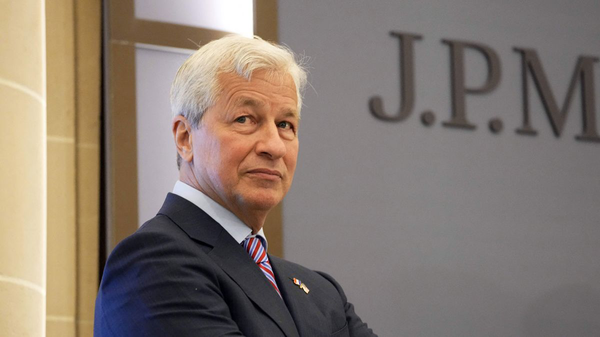

In [10]:
# Afisare studenti care nu au fost la curs:
print("Afisare studenti care nu au fost la curs:")
for i in range(len(nume_studenti)):
    if prezent_la_curs[i] == False:
        print(nume_studenti[i])
        display(redimensionare(adrese_studenti[i]))

# Altele

In [11]:
# Afisare docstring functie
help(redimensionare)

Help on function redimensionare in module __main__:

redimensionare(adresa_imagine)
    Functia returneaza imaginile primite ca argument redimensionate

